In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv(r"C:\Users\purna\Dropbox\PC\Documents\python data visualization documents\innings_deliveries.csv")

In [5]:
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         247 non-null    object
 1   over         247 non-null    int64 
 2   batter       247 non-null    object
 3   bowler       247 non-null    object
 4   non_striker  247 non-null    object
 5   runs_batter  247 non-null    int64 
 6   runs_extras  247 non-null    int64 
 7   runs_total   247 non-null    int64 
 8   player_out   19 non-null     object
 9   wicket_kind  19 non-null     object
 10  fielders     247 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.4+ KB


In [7]:
pd.isnull(df).sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
player_out     228
wicket_kind    228
fielders         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [10]:
df.columns

Index(['team', 'over', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'player_out', 'wicket_kind', 'fielders'],
      dtype='object')

In [11]:
df.describe()

,over,runs_batter,runs_extras,runs_total
count,19.000000,19.000000,19.0,19.000000
mean,11.157895,0.157895,0.0,0.157895
std,6.994150,0.501460,0.0,0.501460
min,0.000000,0.000000,0.0,0.000000
25%,3.000000,0.000000,0.0,0.000000
50%,14.000000,0.000000,0.0,0.000000
75%,17.000000,0.000000,0.0,0.000000
max,19.000000,2.000000,0.0,2.000000


### Run distribution per over for both teams

In [24]:
# Group by team and over, then sum the runs
runs_per_over = df.groupby(['team', 'over'])['runs_total'].sum().reset_index()

# Display the DataFrame
print(runs_per_over)

                           team  over  runs_total
0                Delhi Capitals     0           9
1                Delhi Capitals     1          15
2                Delhi Capitals     2           4
3                Delhi Capitals     3           2
4                Delhi Capitals     4          13
5                Delhi Capitals     5          11
6                Delhi Capitals     6           9
7                Delhi Capitals     7           8
8                Delhi Capitals     8          10
9                Delhi Capitals     9           6
10               Delhi Capitals    10           3
11               Delhi Capitals    11          10
12               Delhi Capitals    12          16
13               Delhi Capitals    13           8
14               Delhi Capitals    14           3
15               Delhi Capitals    15           3
16               Delhi Capitals    16           3
17               Delhi Capitals    17           2
18               Delhi Capitals    18           5


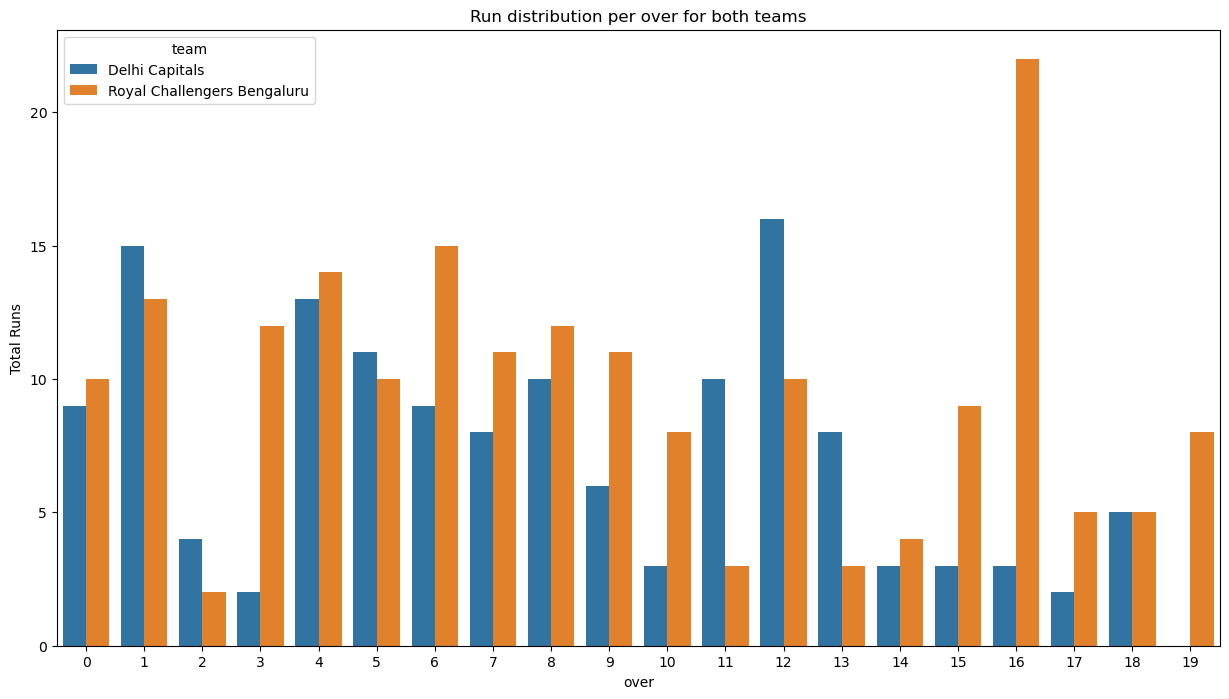

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x='over',y='runs_total',hue='team',data=runs_per_over)
plt.xlabel('over')
plt.ylabel('Total Runs')
plt.title('Run distribution per over for both teams')
plt.show()

### Analyze the top scorers from each team to highlight individual performances

In [3]:
# Sum the runs scored by each batter
total_runs_by_batter = df.groupby(['team', 'batter'])['runs_batter'].sum().reset_index()

# Find the top scorer for each team
top_scorers = total_runs_by_batter.loc[total_runs_by_batter.groupby('team')['runs_batter'].idxmax()]

top_scorers

,team,batter,runs_batter
0,Delhi Capitals,AR Patel,57
16,Royal Challengers Bengaluru,RM Patidar,52


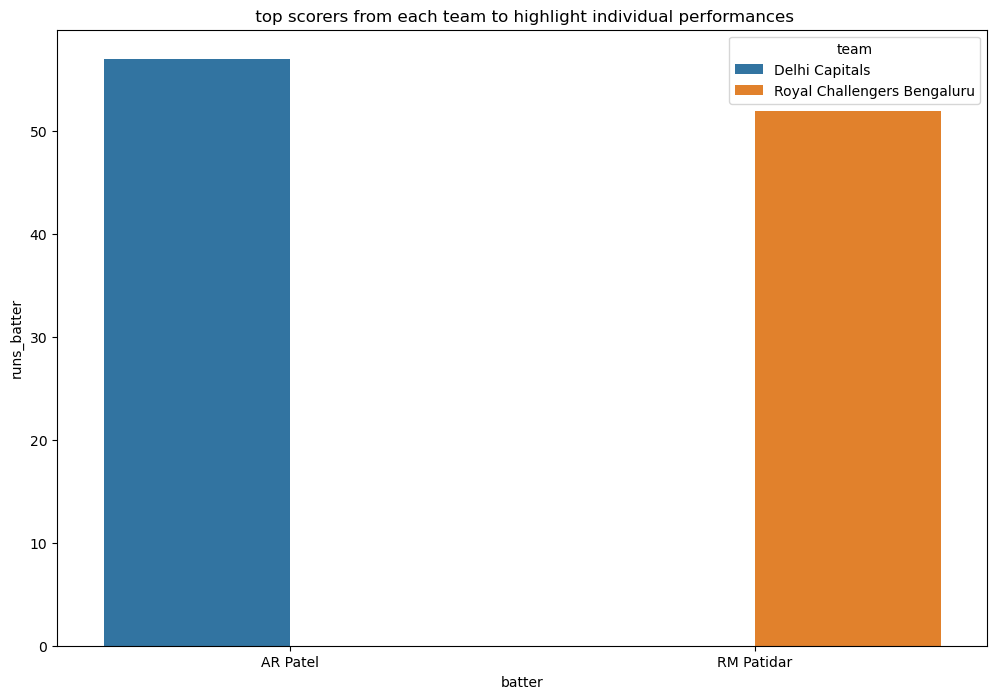

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x='batter',y='runs_batter',hue='team',data=top_scorers)
plt.xlabel('batter')
plt.ylabel('runs_batter')
plt.title(' top scorers from each team to highlight individual performances')
plt.show()

### which bowler took the most wickets and their economy rates(represent using bar and line plot)

In [62]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


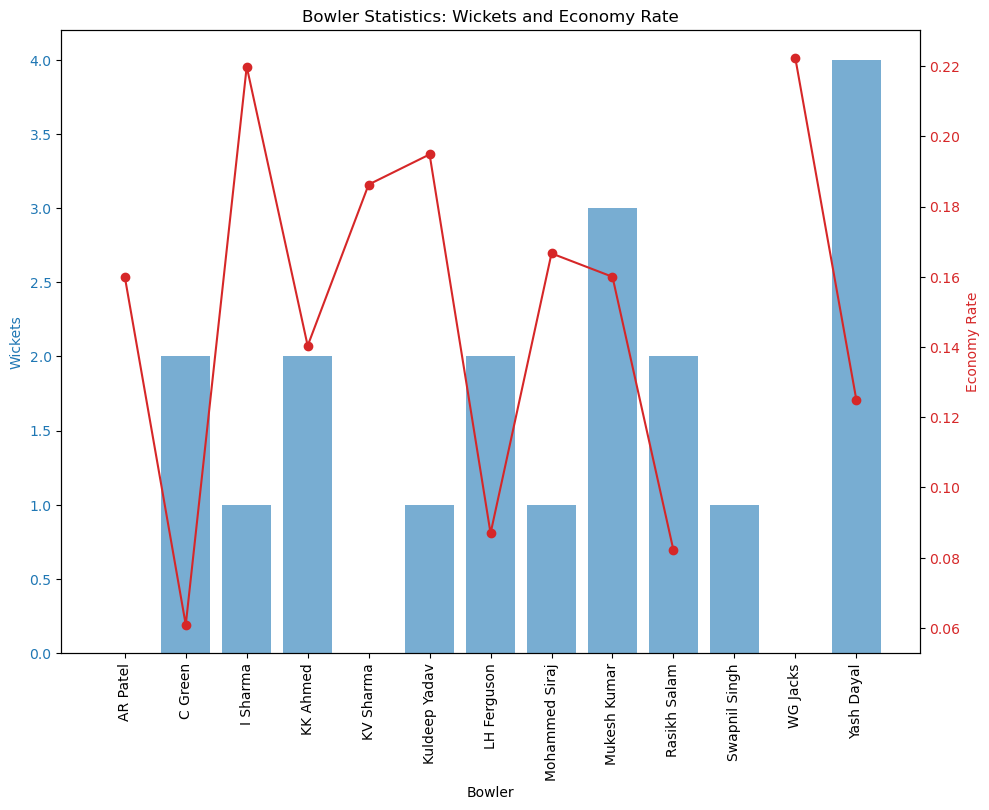

In [67]:
# Calculate total wickets per bowler
wickets = df['wicket_kind'].notna().groupby(df['bowler']).sum()

# Calculate total runs conceded and total overs bowled per bowler
runs_conceded = df.groupby('bowler')['runs_total'].sum()
overs_bowled = df.groupby('bowler')['over'].sum()

# Calculate economy rate
economy_rate = runs_conceded / overs_bowled

# Create a DataFrame for visualization
stats_df = pd.DataFrame({
    'wickets': wickets,
    'economy_rate': economy_rate
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:blue'
ax1.set_xlabel('Bowler')
ax1.set_ylabel('Wickets', color=color)
ax1.bar(stats_df.index, stats_df['wickets'], color=color, alpha=0.6, label='Wickets')
ax1.tick_params(axis='y', labelcolor=color)
# Rotate x-axis labels
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Economy Rate', color=color)
ax2.plot(stats_df.index, stats_df['economy_rate'], color=color, marker='o', linestyle='-', label='Economy Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Bowler Statistics: Wickets and Economy Rate')
plt.show()

### Analyze the types of dismissals that occurred--how most wickets were taken?

wicket_kind
caught     13
run out     4
lbw         1
bowled      1
Name: count, dtype: int64


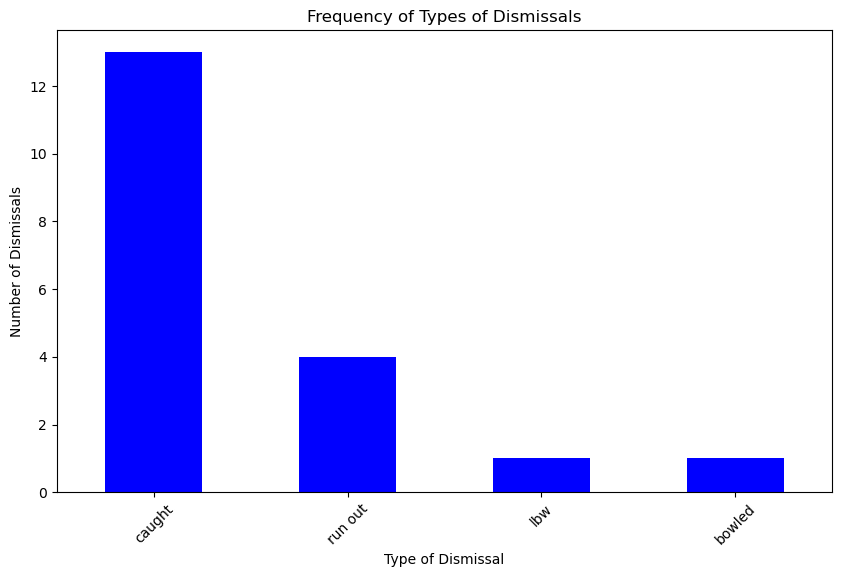

In [79]:
# Filter out the rows where there is a dismissal
dismissals_df = df[df['wicket_kind'].notna()]

# Count the number of each type of dismissal
dismissal_counts = dismissals_df['wicket_kind'].value_counts()
print(dismissal_counts)
# Plot
plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='bar',color='blue')
plt.xlabel('Type of Dismissal')
plt.ylabel('Number of Dismissals')
plt.title('Frequency of Types of Dismissals')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

### The most productive batting partnership in the match

In [82]:
# Calculate runs scored by each partnership
partnership_runs = df.groupby(['batter', 'non_striker'])['runs_total'].sum()

# Find the most productive partnership
most_productive_partnership = partnership_runs.idxmax()
most_productive_runs = partnership_runs.max()

print(f"The most productive partnership is: {most_productive_partnership} with {most_productive_runs} runs.")

The most productive partnership is: ('RM Patidar', 'WG Jacks') with 54 runs.


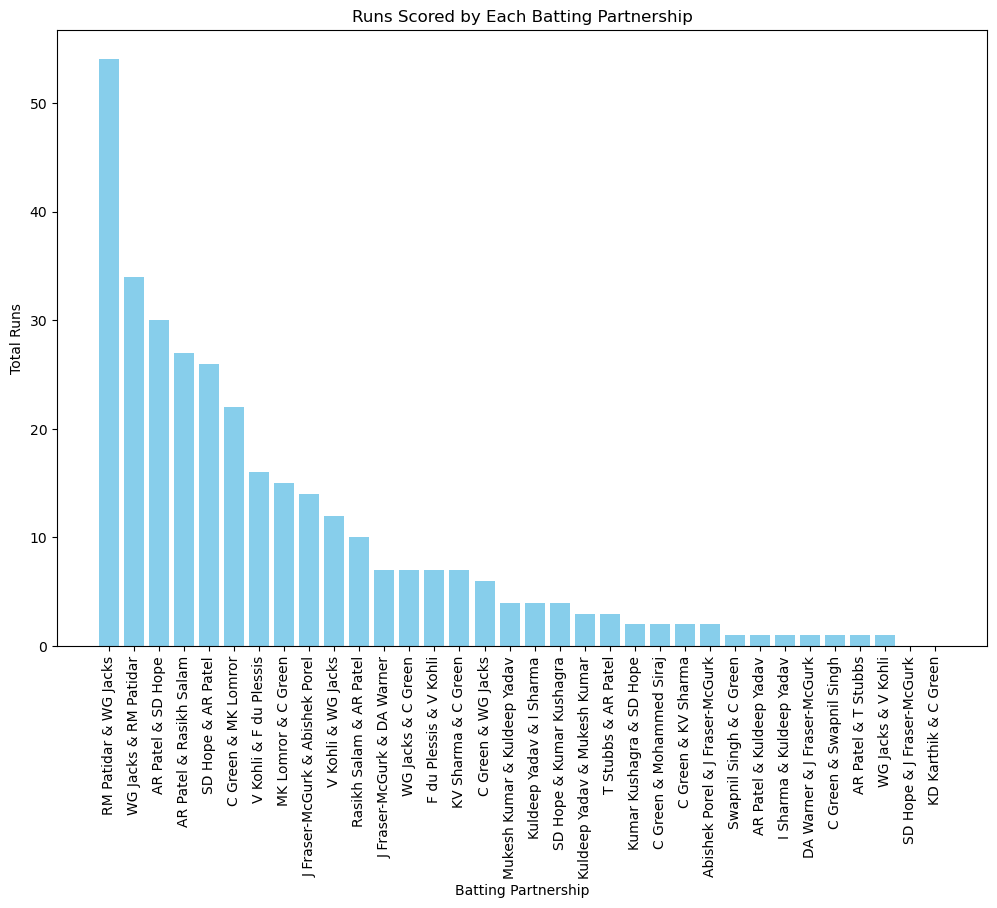

In [87]:
# Prepare data for plotting
partnership_df = partnership_runs.reset_index()
partnership_df.columns = ['Batter', 'Non-Striker', 'Total Runs']

# Sort by Total Runs in descending order
partnership_df = partnership_df.sort_values(by='Total Runs', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.bar(partnership_df['Batter'] + ' & ' + partnership_df['Non-Striker'], partnership_df['Total Runs'], color='skyblue')
plt.xlabel('Batting Partnership')
plt.ylabel('Total Runs')
plt.title('Runs Scored by Each Batting Partnership')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


### How teams performed during different stages of their innings; Powerplay(first 6 overs),middle overs and final overs

In [9]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


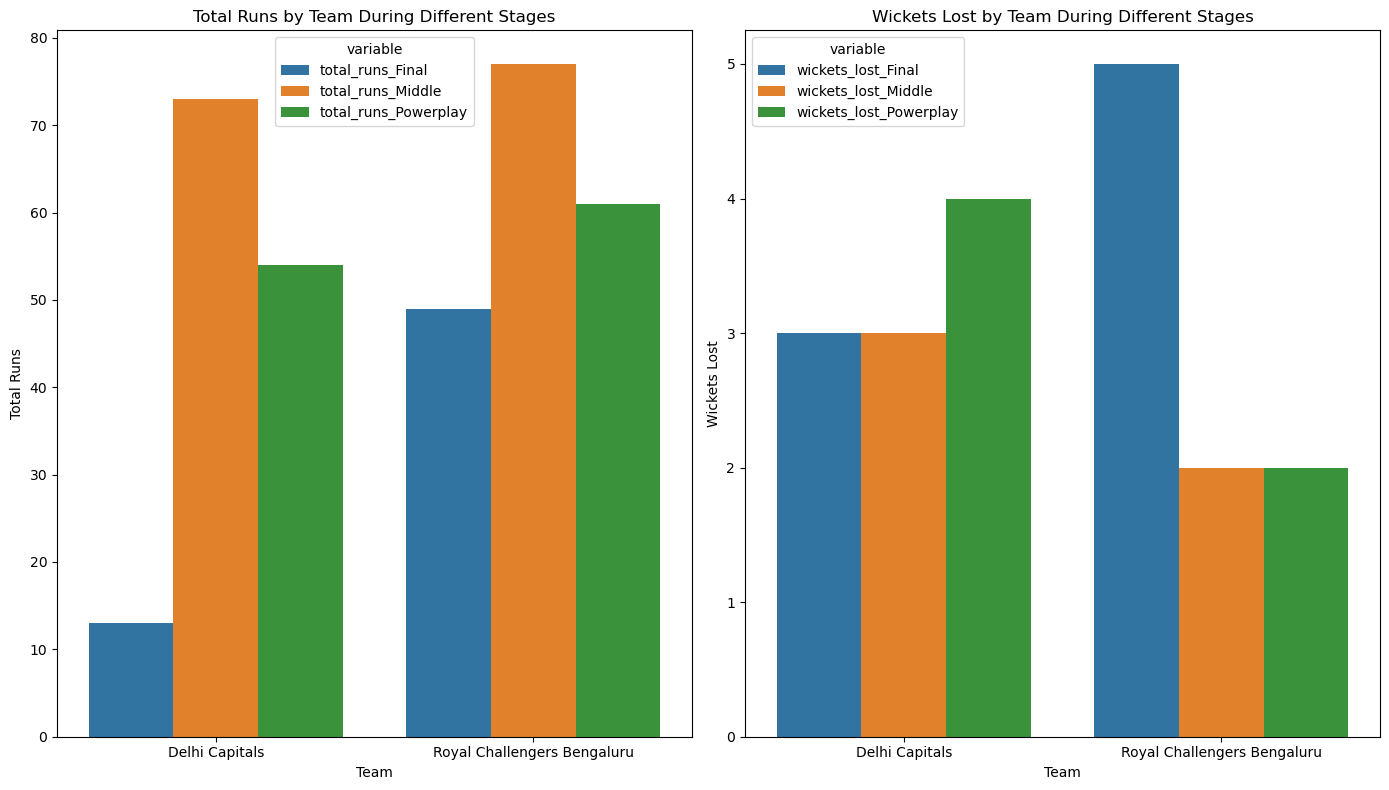

In [23]:
# Define the stages
def categorize_stage(over):
    if over <= 5:
        return 'Powerplay'
    elif over <= 14:
        return 'Middle'
    else:
        return 'Final'

# Add a new column for the stage
df['stage'] = df['over'].apply(categorize_stage)

# Calculate total runs and wickets lost for each team and stage
summary = df.groupby(['team', 'stage']).agg(
    total_runs=('runs_total', 'sum'),
    wickets_lost=('player_out', 'count')
).reset_index()

# Pivot the summary for better readability
summary_pivot = summary.pivot(index='team', columns='stage', values=['total_runs', 'wickets_lost']).fillna(0)

# Flatten the MultiIndex columns
summary_pivot.columns = [f'{stat}_{stage}' for stat, stage in summary_pivot.columns]

# Reset the index to make 'team' a column
summary_pivot.reset_index(inplace=True)

# Plot the bar plot
fig, ax = plt.subplots(1,2, figsize=(14, 8))

# Plot total runs
sns.barplot(data=summary_pivot.melt(id_vars='team', value_vars=[col for col in summary_pivot.columns if 'total_runs' in col]), 
            x='team', y='value', hue='variable', ax=ax[0])
ax[0].set_title('Total Runs by Team During Different Stages')
ax[0].set_ylabel('Total Runs')
ax[0].set_xlabel('Team')

# Plot wickets lost
sns.barplot(data=summary_pivot.melt(id_vars='team', value_vars=[col for col in summary_pivot.columns if 'wickets_lost' in col]), 
            x='team', y='value', hue='variable', ax=ax[1])
ax[1].set_title('Wickets Lost by Team During Different Stages')
ax[1].set_ylabel('Wickets Lost')
ax[1].set_xlabel('Team')

plt.tight_layout()
plt.show()

# Save the plot
fig.savefig('innings_summary_plot.png')


### Top performers of the match

In [28]:
# Calculate total runs scored by each batsman
top_batsmen = df.groupby('batter')['runs_batter'].sum().reset_index().sort_values(by='runs_batter', ascending=False)

# Calculate total wickets taken by each bowler
top_bowlers = df[df['player_out'].notnull()].groupby('bowler').size().reset_index(name='wickets').sort_values(by='wickets', ascending=False)

# Get top performer batsman and bowler
top_batsman = top_batsmen.iloc[0]
top_bowler = top_bowlers.iloc[0]

# Print the top performers
print(f"Top Batsman: {top_batsman['batter']} with {top_batsman['runs_batter']} runs")
print(f"Top Bowler: {top_bowler['bowler']} with {top_bowler['wickets']} wickets")


Top Batsman: AR Patel with 57 runs
Top Bowler: Yash Dayal with 4 wickets


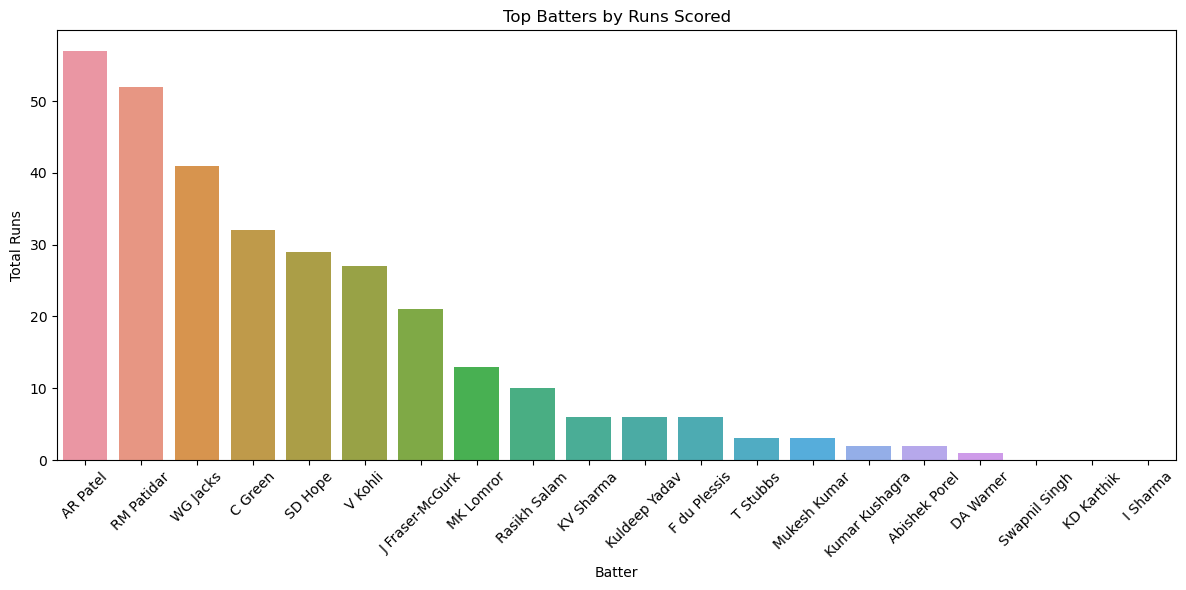

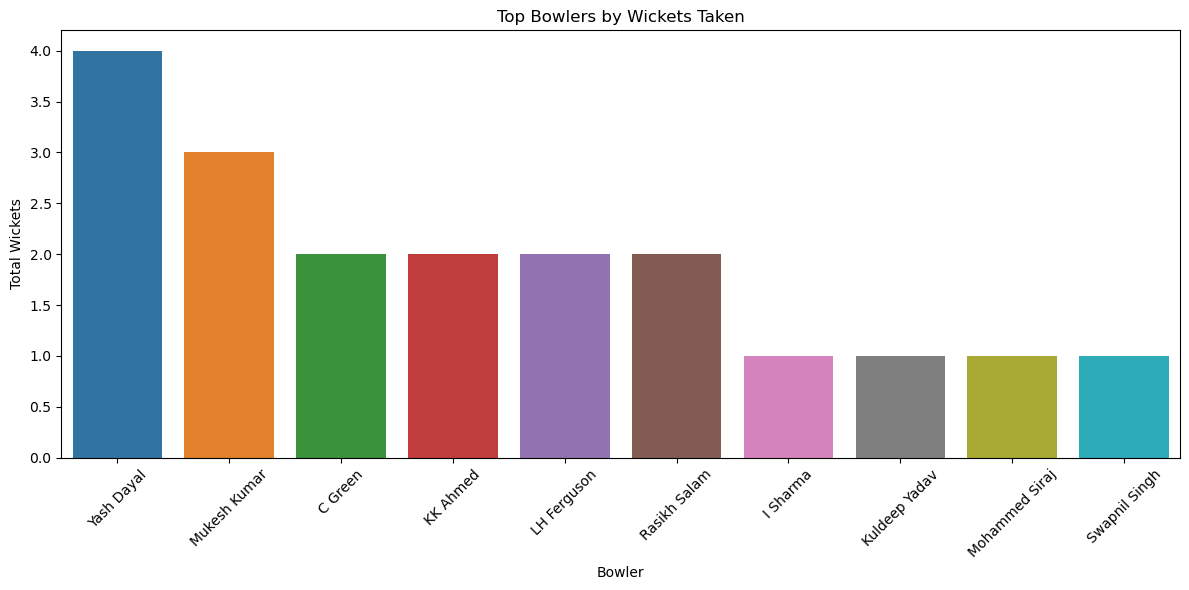

In [41]:
# Plot batting performance
plt.figure(figsize=(12, 6))
sns.barplot(x='batter',y='runs_batter',data=top_batsmen)
plt.title('Top Batters by Runs Scored')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bowling performance (if there were wickets, otherwise this will be empty)
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler',y='wickets',data=top_bowlers)
plt.title('Top Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identifying the turning points in the match

### Steps to Identify Turning Points:
#### Wickets: Identify when wickets fell.
#### Significant Runs: Identify overs with high run rates.
#### Combining Events: Combine these events to highlight critical turning points.

Wickets:
     over          batter          bowler       player_out wicket_kind
13      2    F du Plessis    Mukesh Kumar     F du Plessis      caught
22      3         V Kohli        I Sharma          V Kohli      caught
78     12      RM Patidar    Rasikh Salam       RM Patidar      caught
91     14        WG Jacks   Kuldeep Yadav         WG Jacks      caught
111    17       MK Lomror        KK Ahmed        MK Lomror      caught
113    17      KD Karthik        KK Ahmed       KD Karthik      caught
117    18   Swapnil Singh    Rasikh Salam    Swapnil Singh      caught
125    19         C Green    Mukesh Kumar        KV Sharma     run out
126    19         C Green    Mukesh Kumar   Mohammed Siraj     run out
130     0       DA Warner   Swapnil Singh        DA Warner      caught
139     2   Abishek Porel      Yash Dayal    Abishek Porel      caught
140     2         SD Hope      Yash Dayal  J Fraser-McGurk     run out
147     3  Kumar Kushagra  Mohammed Siraj   Kumar Kushagra         l

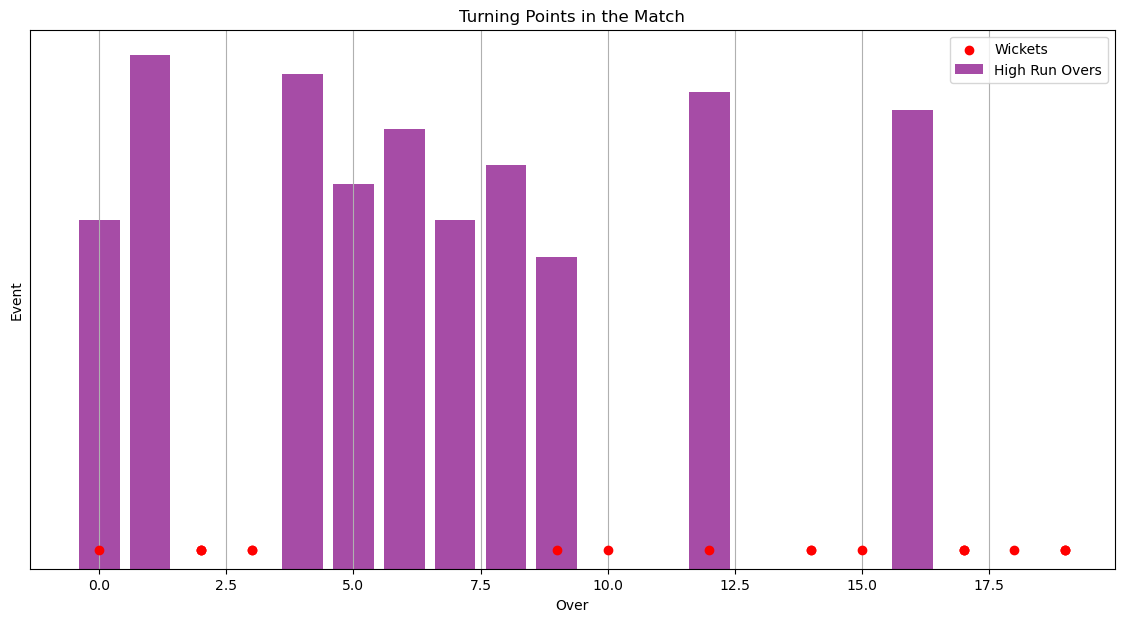

In [56]:
# Identify wickets
wickets = df[df['player_out'].notna()]

# Identify high run overs
average_runs_per_over = df.groupby('over')['runs_total'].sum().mean()
high_run_overs = df.groupby('over')['runs_total'].sum()
significant_overs = high_run_overs[high_run_overs > average_runs_per_over]

# Display wickets and significant overs
print("Wickets:")
print(wickets[['over', 'batter', 'bowler', 'player_out', 'wicket_kind']])

print("\nSignificant Overs:")
print(significant_overs)

# Plot wickets
plt.figure(figsize=(14, 7))
plt.scatter(wickets['over'], [1] * len(wickets), color='red', label='Wickets', zorder=5)
plt.title('Turning Points in the Match')
plt.xlabel('Over')
plt.ylabel('Event')
plt.yticks([])

# Plot significant overs
plt.bar(significant_overs.index, significant_overs.values, color='purple', label='High Run Overs', alpha=0.7)

plt.legend()
plt.grid(axis='x')
plt.show()


### Analyze the cumulative run rate comparison throughout the innings and look at wickets fall events

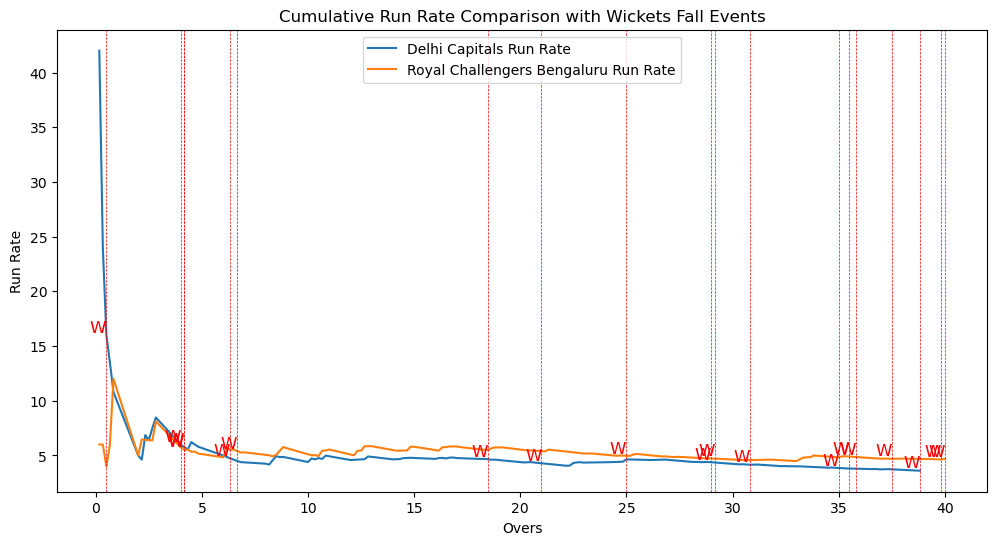

In [6]:
# Calculate cumulative runs and run rate
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_overs'] = df['over'] + df.groupby('team').cumcount() / 6  # Each delivery is a fraction of an over
df['run_rate'] = df['cumulative_runs'] / df['cumulative_overs']

# Identify wicket events
wicket_events = df[df['player_out'].notna()]

# Plotting
plt.figure(figsize=(12, 6))

# Plot cumulative run rate
for team, group in df.groupby('team'):
    plt.plot(group['cumulative_overs'], group['run_rate'], label=f'{team} Run Rate')

# Mark wicket events
for idx, row in wicket_events.iterrows():
    plt.axvline(x=row['cumulative_overs'], color='red', linestyle='--', linewidth=0.5)
    plt.text(row['cumulative_overs'], row['run_rate'], f'W', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('Overs')
plt.ylabel('Run Rate')
plt.title('Cumulative Run Rate Comparison with Wickets Fall Events')
plt.legend()
plt.show()


## calculate the run rate for each over for both teams and see how the run rates
## changed throughout the innings,  partially focusing on the overs where the wickets fell.


                           team  over  runs_total  run_rate  wickets
0                Delhi Capitals     0           9  1.500000      1.0
1                Delhi Capitals     1          15  2.500000      0.0
2                Delhi Capitals     2           4  0.666667      2.0
3                Delhi Capitals     3           2  0.333333      1.0
4                Delhi Capitals     4          13  2.166667      0.0
5                Delhi Capitals     5          11  1.833333      0.0
6                Delhi Capitals     6           9  1.500000      0.0
7                Delhi Capitals     7           8  1.333333      0.0
8                Delhi Capitals     8          10  1.666667      0.0
9                Delhi Capitals     9           6  1.000000      1.0
10               Delhi Capitals    10           3  0.500000      1.0
11               Delhi Capitals    11          10  1.666667      0.0
12               Delhi Capitals    12          16  2.666667      0.0
13               Delhi Capitals   

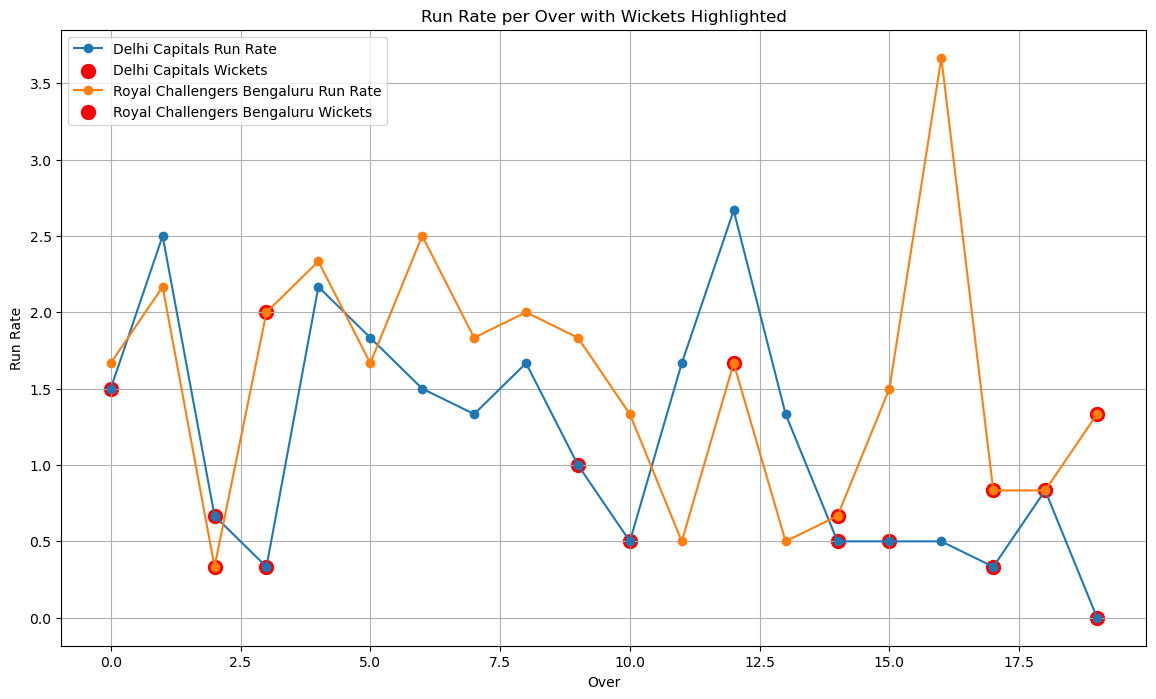

In [17]:
# Calculate total runs per over for each team
over_runs = df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

# Calculate run rate for each over (assuming each over has 6 balls)
over_runs['run_rate'] = over_runs['runs_total'] / 6

# Identify overs where wickets fell
wickets = df.dropna(subset=['player_out']).groupby(['team', 'over']).size().reset_index(name='wickets')

# Merge the two dataframes to get run rates and wickets together
over_runs_wickets = pd.merge(over_runs, wickets, on=['team', 'over'], how='left').fillna(0)
print(over_runs_wickets)
# Plot the run rates for both teams and highlight overs with wickets
teams = over_runs_wickets['team'].unique()
plt.figure(figsize=(14, 8))

for team in teams:
    team_data = over_runs_wickets[over_runs_wickets['team'] == team]
    plt.plot(team_data['over'], team_data['run_rate'], marker='o', label=f"{team} Run Rate")
    plt.scatter(team_data[team_data['wickets'] > 0]['over'], team_data[team_data['wickets'] > 0]['run_rate'], color='red', s=100, label=f"{team} Wickets")

plt.title('Run Rate per Over with Wickets Highlighted')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.legend()
plt.grid(True)
plt.show()
